# **Detecting Lung Cancer from CT Scan Images**

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Exploratory Data Analysis

Dataset link: https://data.mendeley.com/datasets/bhmdr45bh2/1

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Path to the dataset
base_path = '/content/gdrive/My Drive/CSE424/Project/LungCancerDataset'

# Subfolder paths
benign_path = os.path.join(base_path, 'Benign cases')
malignant_path = os.path.join(base_path, 'Malignant cases')
normal_path = os.path.join(base_path, 'Normal cases')

In [ ]:
def list_files(path):
    return [os.path.join(path, file) for file in os.listdir(path) if file.endswith(('.jpg', '.png', '.jpeg'))]

benign_files = list_files(benign_path)
malignant_files = list_files(malignant_path)
normal_files = list_files(normal_path)

print(f"Benign cases: {len(benign_files)}")
print(f"Malignant cases: {len(malignant_files)}")
print(f"Normal cases: {len(normal_files)}")

Benign cases: 120
Malignant cases: 561
Normal cases: 416


<ipython-input-16-3611b9c6c224>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Category', y='Count', palette='viridis')


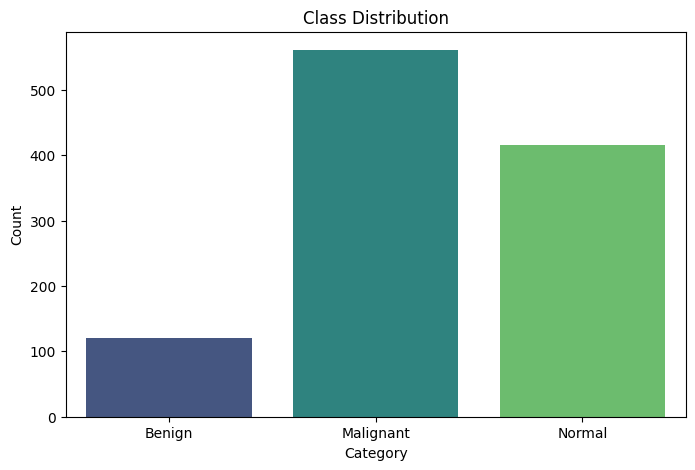

In [ ]:
categories = ['Benign', 'Malignant', 'Normal']
counts = [len(benign_files), len(malignant_files), len(normal_files)]

df = pd.DataFrame({'Category': categories, 'Count': counts})

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Category', y='Count', palette='viridis')
plt.title('Class Distribution')
plt.show()

There is a class imbalance as the number of Benign cases is very low. This will be addressed in the data preprocessing part.

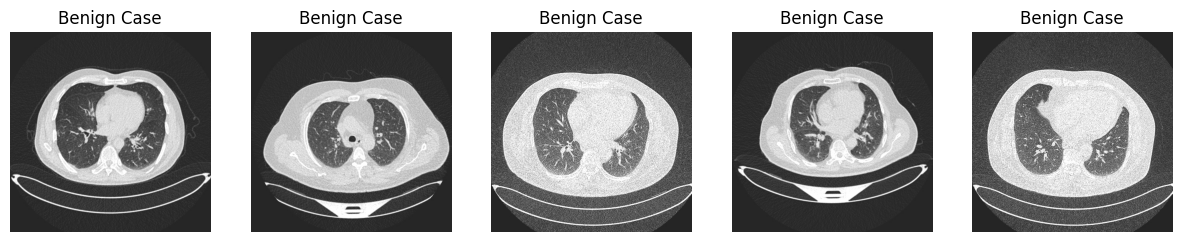

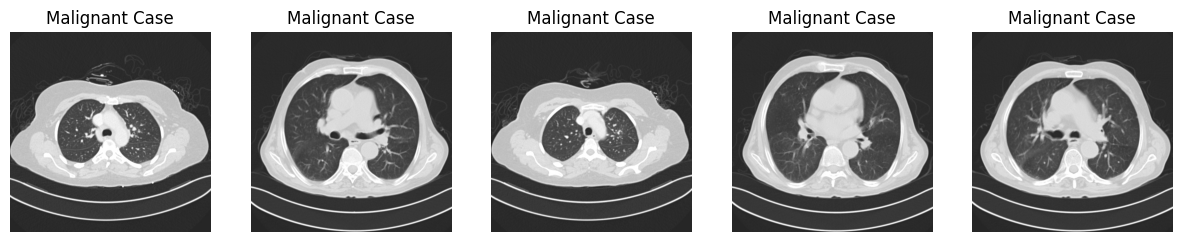

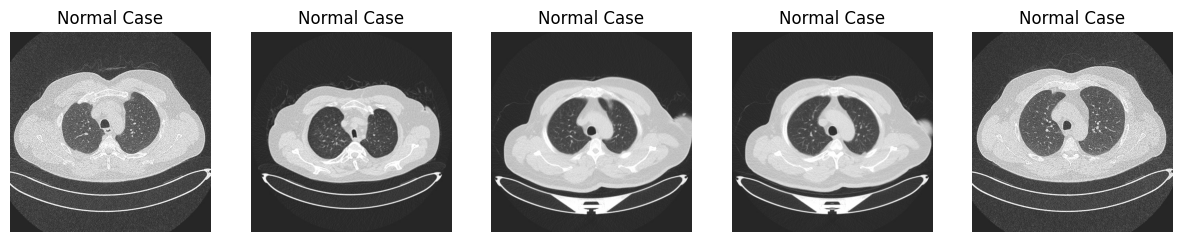

In [ ]:
def display_samples(files, title, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        img = Image.open(files[i])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(title)
    plt.show()

display_samples(benign_files, "Benign Case")
display_samples(malignant_files, "Malignant Case")
display_samples(normal_files, "Normal Case")

Benign Image Shape Stats: Min width=512 and Max width=512 and Min height=512 and Max width=512
Malignant Image Shape Stats: Min width=511 and Max width=801 and Min height=404 and Max width=512
Normal Image Shape Stats: Min width=506 and Max width=512 and Min height=331 and Max width=512


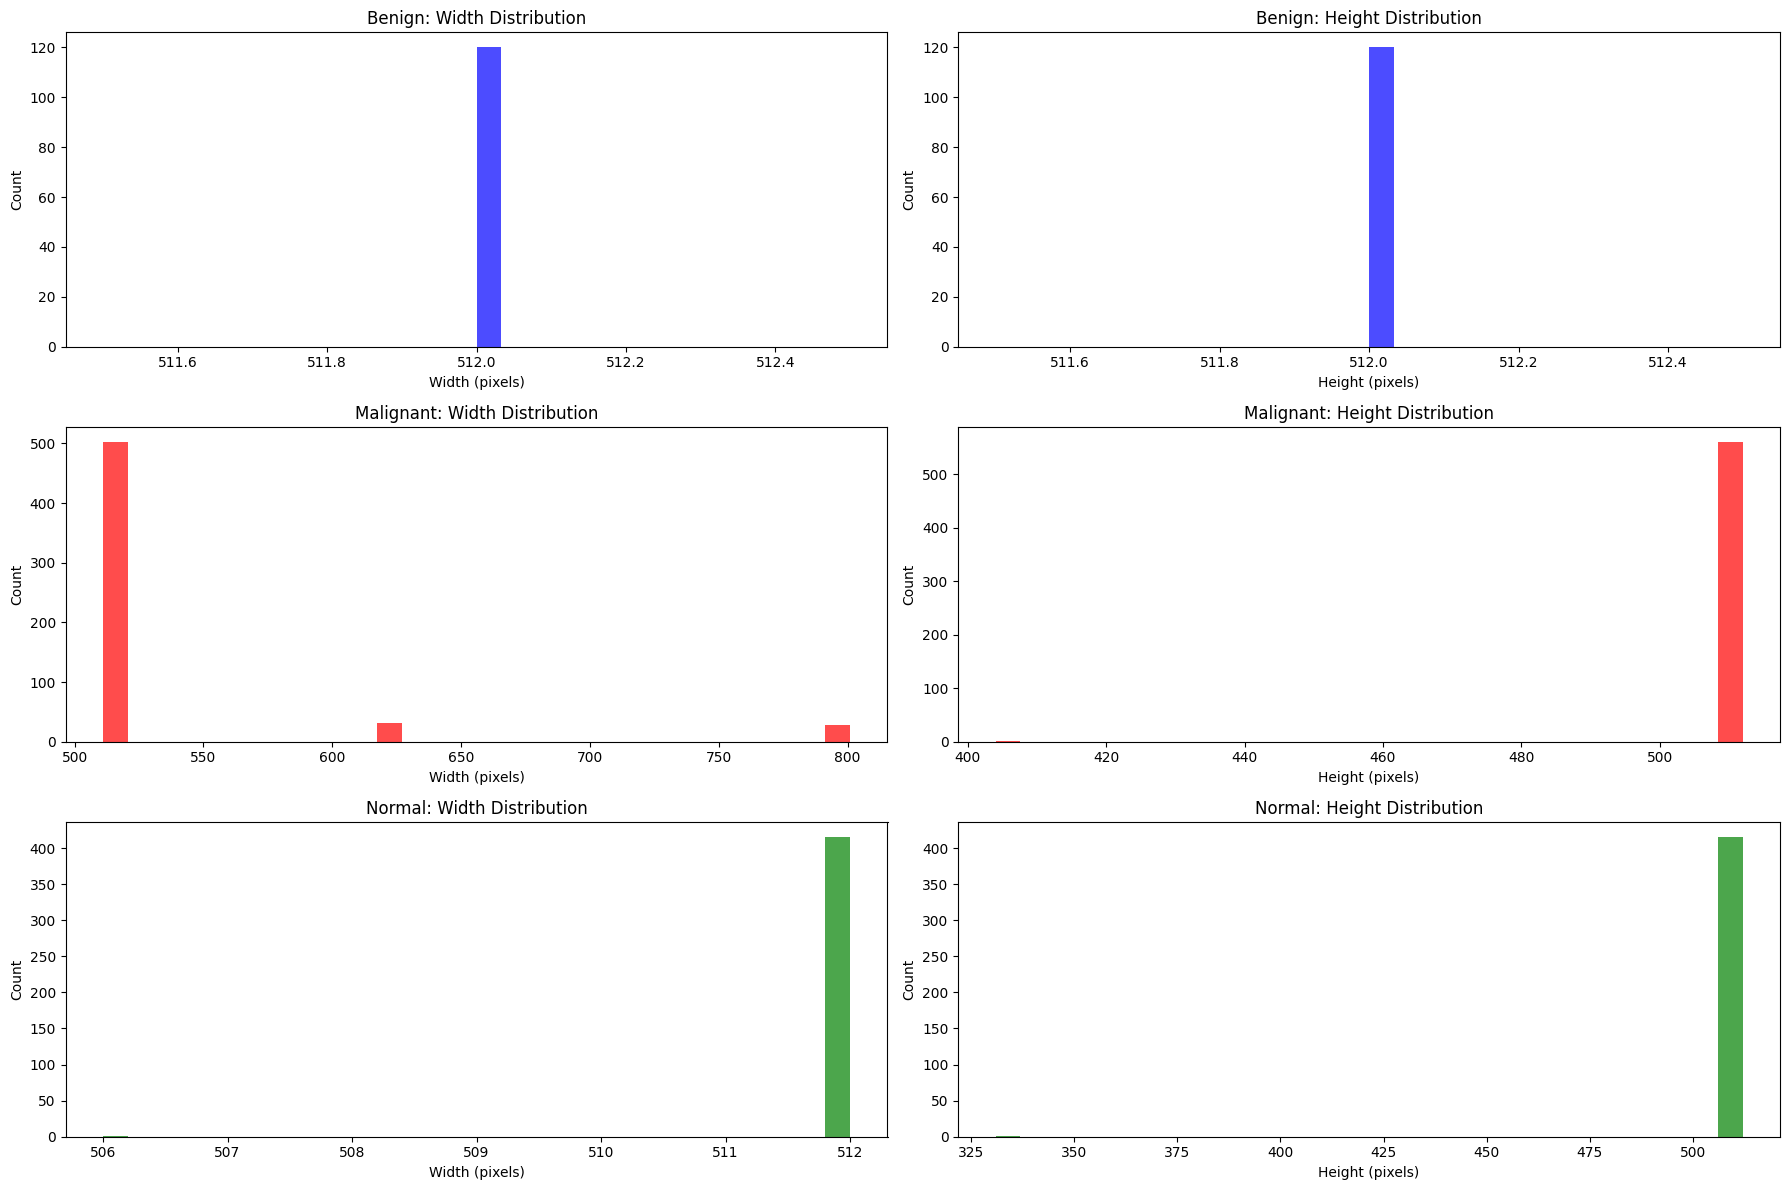

In [ ]:
def get_image_shapes(files):
    dimensions = [Image.open(file).size for file in files]
    return dimensions

benign_dimensions = get_image_shapes(benign_files)
malignant_dimensions = get_image_shapes(malignant_files)
normal_dimensions = get_image_shapes(normal_files)

benign_widths, benign_heights = zip(*benign_dimensions)
malignant_widths, malignant_heights = zip(*malignant_dimensions)
normal_widths, normal_heights = zip(*normal_dimensions)

# Plot histograms for each class
plt.figure(figsize=(18, 12))

# Benign
plt.subplot(3, 2, 1)
plt.hist(benign_widths, bins=30, alpha=0.7, color='blue')
plt.title('Benign: Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Count')
print(f"Benign Image Shape Stats: Min width={min(benign_widths)} and Max width={max(benign_widths)} and Min height={min(benign_heights)} and Max width={max(benign_heights)}")

plt.subplot(3, 2, 2)
plt.hist(benign_heights, bins=30, alpha=0.7, color='blue')
plt.title('Benign: Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Count')

# Malignant
plt.subplot(3, 2, 3)
plt.hist(malignant_widths, bins=30, alpha=0.7, color='red')
plt.title('Malignant: Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Count')
print(f"Malignant Image Shape Stats: Min width={min(malignant_widths)} and Max width={max(malignant_widths)} and Min height={min(malignant_heights)} and Max width={max(malignant_heights)}")

plt.subplot(3, 2, 4)
plt.hist(malignant_heights, bins=30, alpha=0.7, color='red')
plt.title('Malignant: Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Count')

# Normal
plt.subplot(3, 2, 5)
plt.hist(normal_widths, bins=30, alpha=0.7, color='green')
plt.title('Normal: Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Count')
print(f"Normal Image Shape Stats: Min width={min(normal_widths)} and Max width={max(normal_widths)} and Min height={min(normal_heights)} and Max width={max(normal_heights)}")

plt.subplot(3, 2, 6)
plt.hist(normal_heights, bins=30, alpha=0.7, color='green')
plt.title('Normal: Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Benign and Normal cases have uniform height and widths whereas Malignant cases have slight variations.

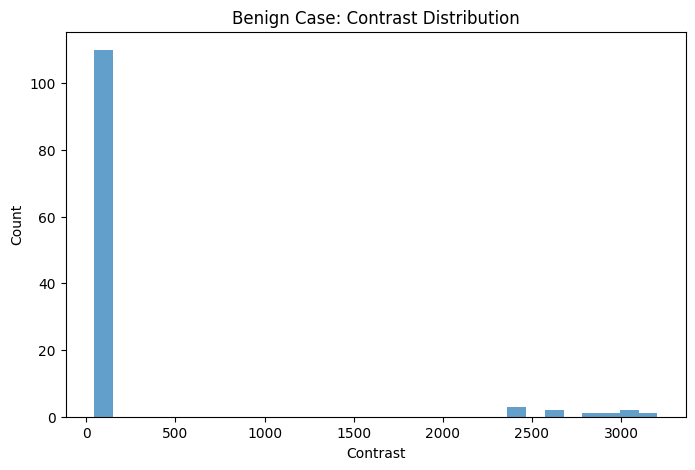

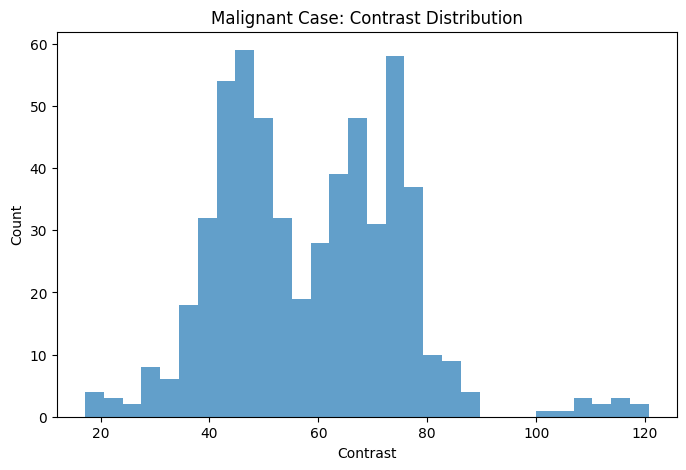

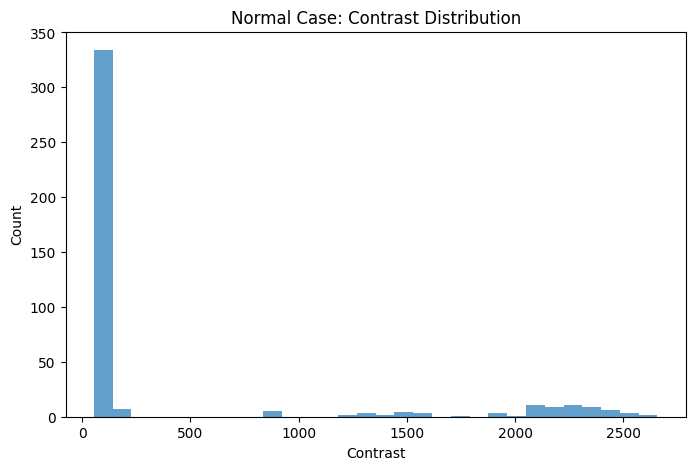

In [ ]:
from skimage.feature import graycomatrix, graycoprops

def texture_analysis(files, title):
    textures = []
    for file in files:
        img = Image.open(file).convert("L")  # Convert to grayscale
        img_array = np.array(img)
        glcm = graycomatrix(img_array, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        textures.append(contrast)

    plt.figure(figsize=(8, 5))
    plt.hist(textures, bins=30, alpha=0.7)
    plt.title(f'{title}: Contrast Distribution')
    plt.xlabel('Contrast')
    plt.ylabel('Count')
    plt.show()

texture_analysis(benign_files, "Benign Case")
texture_analysis(malignant_files, "Malignant Case")
texture_analysis(normal_files, "Normal Case")

We used GLCM for feature extraction because unlike simple pixel intensity-based features, GLCM considers the relationships between neighboring pixels, providing rich texture information. This makes it particularly well-suited for tasks that require analyzing fine-grained texture patterns, such as medical image analysis.

Contrast measures the local variations in the image. High contrast values indicate large differences between neighboring pixel intensities.

Benign and Normal cases have majority contrast around 100-300 while some have very high contrast around 2500. Malignant cases, on the other hand are limited to contrast less than 120.